In [43]:
! pip install kaggle fastai dtreeviz scipy
import kaggle
import shutil
import torch
from pathlib import Path

from fastai.vision import gan
from fastai.vision.all import get_image_files, Resize, ResizeMethod, Normalize, show_image, TensorImage
from fastai.data.block import DataBlock, TransformBlock, IndexSplitter
from fastai.vision.all import ImageBlock


In [3]:
path = Path('.')/'data'
kaggle.api.competition_download_cli('gan-getting-started', path=path)
shutil.unpack_archive(str(path/'gan-getting-started.zip'), str(path))

gan-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


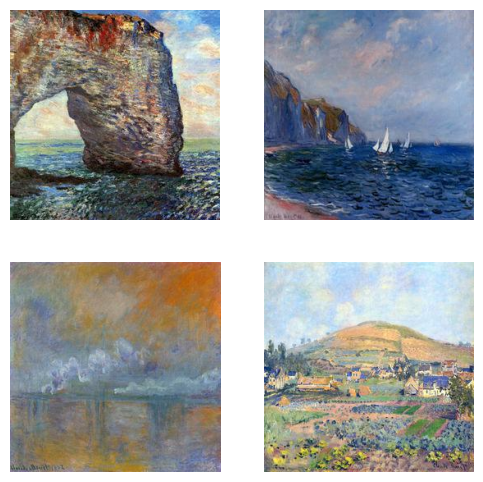

In [59]:
batch_size = 12
size = 256
dblock = DataBlock(
    blocks=(TransformBlock, ImageBlock),
    get_x=lambda x: gan.generate_noise(x, size),
    get_items=get_image_files,
    splitter=IndexSplitter([]),
    item_tfms=Resize(size),
    batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5]))
    )
dls = dblock.dataloaders(path/"monet_jpg", path=path/"monet_jpg", batch_size=batch_size)
dls.c = 3
dls.show_batch(max_n=4)

In [60]:
x, y = dls.one_batch()
x.shape, y.shape

(torch.Size([12, 256]), torch.Size([12, 3, 256, 256]))

In [61]:
critic = gan.basic_critic(
    in_size=256,
    n_channels=3,
    n_features=64,
    n_extra_layers=0)
generator = gan.basic_generator(
    out_size=256,
    n_channels=3,
    in_sz=256,
    n_features=64,
    n_extra_layers=0)

In [62]:
learn = gan.GANLearner.wgan(
    dls=dls,
    generator=generator,
    critic=critic)
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False
learn.fit(1, 2e-4, wd=0.)

/Users/bryan/Documents/kaggle/.venv/lib/python3.11/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/Users/bryan/Documents/kaggle/.venv/lib/python3.11/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/Users/bryan/Documents/kaggle/.venv/lib/python3.11/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,gen_loss,crit_loss,time
